# Implementation

- I

- Not only will this be a good machine learning lesson, but also for life in general because I cannot tell apart cloths for the life of me


# 1 - Importing libraries and dataset

- we import the necessary libraries and dataset which is stored in the tensorflow library.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 2. Data size and plot sample images

- we will plot some sample images of what each catagory looks like, in the format that the dataset is in. 

Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


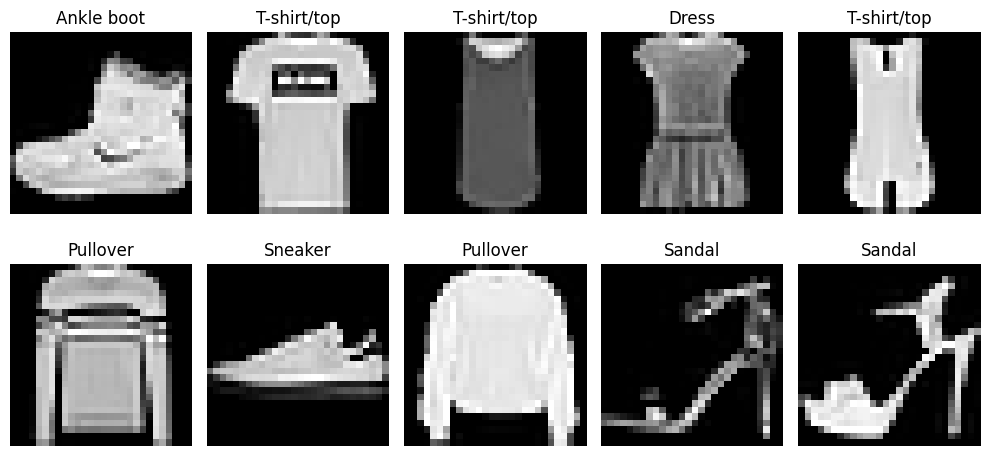

In [2]:
# Check shape and basic stats
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Unique labels: {np.unique(y_train)}")

# Plot some sample images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

# 3. Data normalization, flattening, and one-hot encode catagorical lables

- we normalize the data by scaling pixel values to 0 - 1, flatten the matrix into a useble column vector, and use one-hot encoding to convert categorical labels to numerical ones.

In [6]:
# Normalize: scale pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the training images into column vectors (784 x 1) and one-hot encode labels
flat_train_X = []
onehot_train_y = []

for x, y in zip(X_train, y_train):
    flat_train_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    onehot_train_y.append(temp_vec)

# Flatten and encode test data
flat_test_X = []
onehot_test_y = []

for x, y in zip(X_test, y_test):
    flat_test_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    onehot_test_y.append(temp_vec)

# 4 - Defining necessary functions

- Sigmoid - used as the activation function

- MSE - used as cost function

- A weight initialization function using He initialization

In [18]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

def d_sigmoid(z):
  return sigmoid(z)*(1.0-sigmoid(z))

def mse(a, y):
  return .5*sum((a[i]-y[i])**2 for i in range(10))[0]

In [8]:
def initialize_weights(layers = [784, 60, 60, 10]):
    # The following Python lists will contain numpy matrices
    # connected the layers in the neural network 
    W = [[0.0]]
    B = [[0.0]]
    for i in range(1, len(layers)):
        # The scalling factor is something I found in a research paper :)
        w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
        b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])
    
        W.append(w_temp)
        B.append(b_temp)
    return W, B

# 5. Manual feedforward with dimention of 3

- we will manually implement a feedforward process with dimention of 3 to check for the dimentionality of each step

In [10]:
W, B = initialize_weights()

xi = flat_train_X[0]
yi = onehot_train_y[0]
a0 = xi

print(f"np.shape(a0) = {np.shape(a0)} \n")

z1 = W[1] @ a0 + B[1]
a1 = sigmoid(z1)

print(f"np.shape(W[1]) = {np.shape(W[1])}")
print(f"np.shape(z1) = {np.shape(z1)}")
print(f"np.shape(a1) = {np.shape(a1)} \n")

z2 = W[2] @ a1 + B[2]
a2 = sigmoid(z2)

print(f"np.shape(W[2]) = {np.shape(W[2])}")
print(f"np.shape(z2) = {np.shape(z2)}")
print(f"np.shape(a2) = {np.shape(a2)} \n")

z3 = W[3] @ a2 + B[3]
a3 = sigmoid(z3)
y_hat = a3
print(f"np.shape(W[3]) = {np.shape(W[3])}")
print(f"np.shape(z3) = {np.shape(z3)}")
print(f"np.shape(a3) = {np.shape(a3)} \n")


print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")

np.shape(a0) = (784, 1) 

np.shape(W[1]) = (60, 784)
np.shape(z1) = (60, 1)
np.shape(a1) = (60, 1) 

np.shape(W[2]) = (60, 60)
np.shape(z2) = (60, 1)
np.shape(a2) = (60, 1) 

np.shape(W[3]) = (10, 60)
np.shape(z3) = (10, 1)
np.shape(a3) = (10, 1) 

Prediction: np.argmax(y_hat) = 2
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 1.5033165901027123


** Remarks **

- looking at the dimentions of each propagation, this confirms the weight initialization and matrix operations are dimensionally correct.

- however, the model predicted the label wrong(getting 2 instead of 9), which makes sense as this is right after initialization with no training.

- we will now automate this forward pass process in a function



# 6. Forward pass as a function

- we will implement the above steps as a callable function


In [12]:
def forward_pass(W, B, xi, predict_vector = False):
    Z = [[0.0]]
    A = [xi]
    L = len(W) - 1
    for i in range(1, L + 1):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)
        
        a = sigmoid(z)
        A.append(a)
        
    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

def predict(W, B, xi):
    _, A = forward_pass(W, B, xi)
    return np.argmax(A[-1])

y_hat = forward_pass(W, B, flat_train_X[0], predict_vector=True)
print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")


Prediction: np.argmax(y_hat) = 2
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 1.5033165901027123


** Remarks **
- Worked just as before


# 7 - Define aditional functions

- random_experiment - making a prediction on a random data point

- MSE - computes the error over an entire set of features and labels

In [13]:
def random_experiment(W, B, data_features, data_labels):
    i = np.random.randint(len(data_features))
    print(f"Actual label: {np.argmax(data_labels[i])}")
    print(f"Predicted label: {predict(W, B, data_features[i])}")
    

def MSE(W, B, X, y):
    cost = 0.0
    m = 0
    for xi, yi in zip(X, y):
        a = forward_pass(W, B, xi, predict_vector = True)
        cost += mse(a, yi)
        m+=1
    return cost/m

In [15]:
print(f"MSE(W, B, flat_train_X, onehot_train_y) = {MSE(W, B, flat_train_X, onehot_train_y)} \n")

random_experiment(W, B, flat_train_X, onehot_train_y)

MSE(W, B, flat_train_X, onehot_train_y) = 1.391090986066199 

Actual label: 7
Predicted label: 2


# 8 - Write custom class for Dense Network Object

- here we create a class that initializes the weights and bias for the network, and implements stochastic gradient descent

In [16]:
class DenseNetwork(object):
    def __init__(self, layers = [784, 60, 60, 10]):
        self.layers = layers
        self.W, self.B = initialize_weights(layers = self.layers)

    def train(self, X_train, y_train, alpha = 0.046, epochs = 4):
        # Print the initial mean squared error
        self.errors_ = [MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")

        # Find your sample size
        sample_size = len(X_train)

        # Find the number of non-input layers.
        L = len(self.layers) - 1

        # For each epoch perform stochastic gradient descent. 
        for k in range(epochs):
            # Loop over each (xi, yi) training pair of data.
            for xi, yi in zip(X_train, y_train):
                # Use the forward pass function defined before
                # and find the preactivation and postactivation values.
                Z, A = forward_pass(self.W, self.B, xi)

                # Store the errors in a dictionary for clear interpretation
                # of computation of these values.
                deltas = dict()

                # Compute the output error 
                output_error = (A[L] - yi)*d_sigmoid(Z[L])
                deltas[L] = output_error

                # Loop from L-1 to 1. Recall the right entry of the range function 
                # is non-inclusive. 
                for i in range(L-1, 0, -1):
                    # Compute the node errors at each hidden layer
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])

                # Loop over each hidden layer and the output layer to perform gradient 
                # descent. 
                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

            # Show the user the cost over all training examples
            self.errors_.append(MSE(self.W, self.B, X_train, y_train))   
            print(f"{k + 1}-Epoch Cost = {self.errors_[-1]}")
    

    def predict(self, xi):
        depth = len(self.layers)
        _, A = forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])


# 9 - Create DenseNetowrk object and train model

- we will make an DenseNetwork object, have it make a prediction on a randomly selected picture, and then train the model over epochs to see if it does any better.

MSE(net.W, net.B, flat_train_X, onehot_train_y) = 1.0585467184410955 

predicted digit is: 7
actual digit is: 5


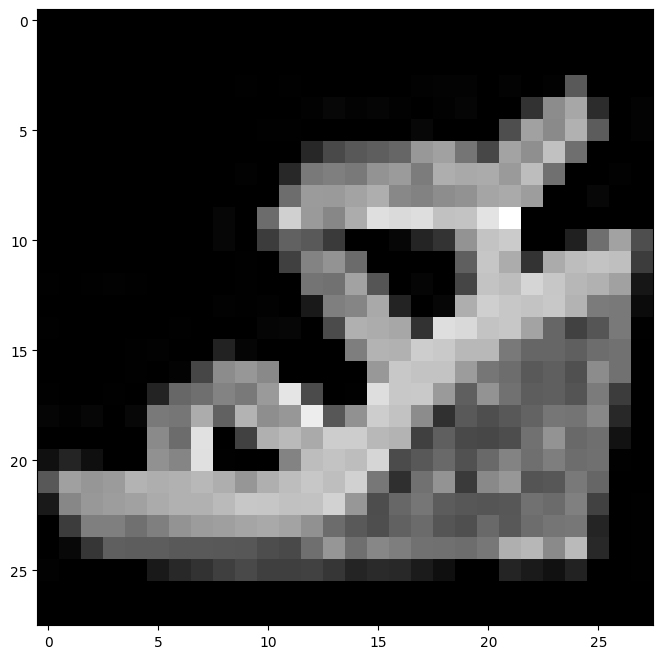

In [20]:
# Initialize a network with 784 input nodes, two hidden layers with 60 nodes each 
# and a output layer with 10 nodes. 
net = DenseNetwork(layers = [784, 120, 145, 120, 10])

# Check the mean squared error before training 
print(f"MSE(net.W, net.B, flat_train_X, onehot_train_y) = {MSE(net.W, net.B, flat_train_X, onehot_train_y)} \n")

# Make a random prediction before training
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(X_test[i], cmap="gray")
plt.show()

# 9.1 - Training and plotting the MSE over epochs

### *VERY SLOW; TAKES AROUND 1 MINUTE TO FINISH*

- we train the model using stochastic gradient descent, record the MSE over each epoch, and finally plot the MSE's over epochs

Starting Cost = 1.0585467184410955
1-Epoch Cost = 0.45078864377906414
2-Epoch Cost = 0.4504741860454569
3-Epoch Cost = 0.45036070969336517
4-Epoch Cost = 0.45030326906633994


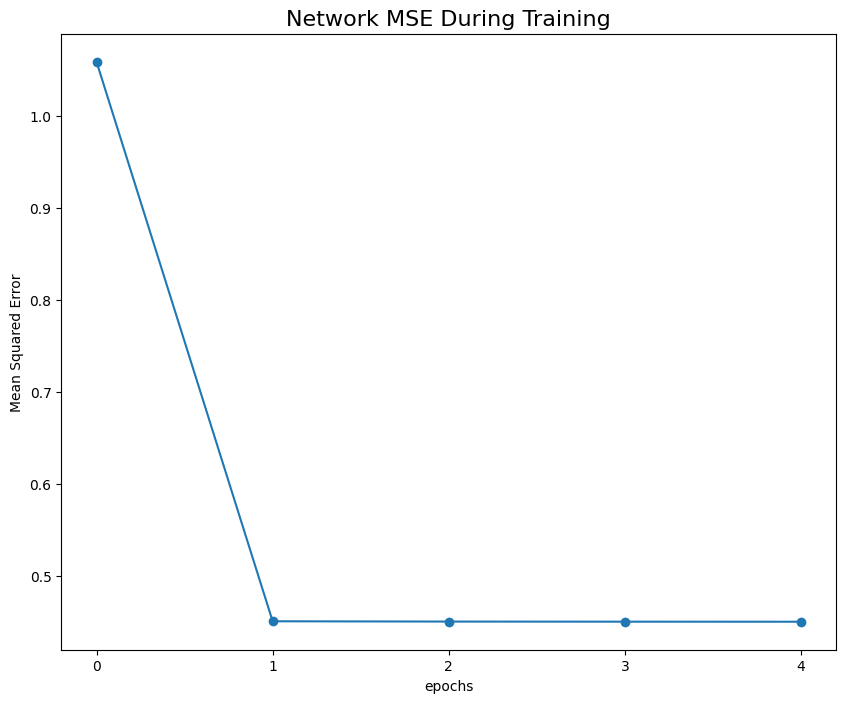

In [ ]:
# Train your network with stochastic gradient descent!
net.train(flat_train_X, onehot_train_y)


# Visualize the mean squared error over the training process 
plt.figure(figsize = (10, 8))
epochs = range(len(net.errors_))
plt.plot(epochs, net.errors_, marker = "o")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")
plt.title("Network MSE During Training", fontsize = 16)
plt.show()


** Remarks **

- We see the MSE dropping significantly after 1 epoch to around 0.45, but plateauing at around 0.45 from there on. 

- We will now have the model make a few random predictions for a few pictures from the dataset:

predicted digit is: 2
actual digit is: 8


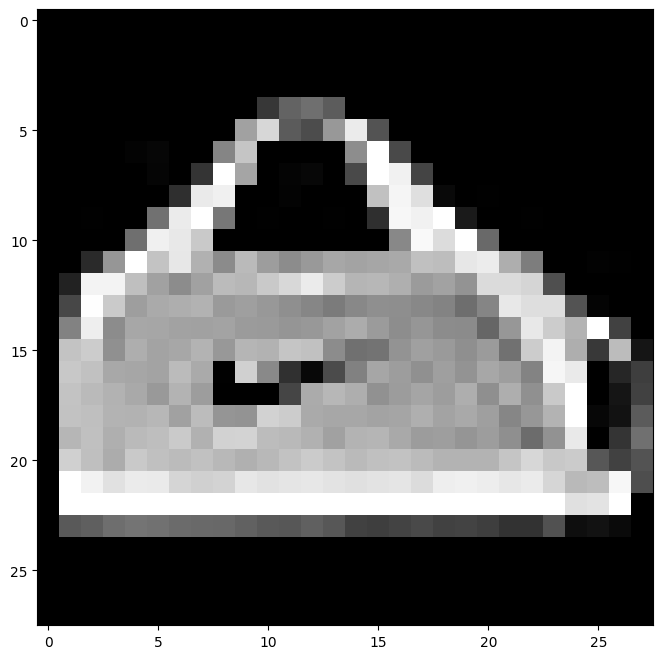

In [60]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(X_test[i], cmap="gray")
plt.show()

predicted digit is: 2
actual digit is: 3


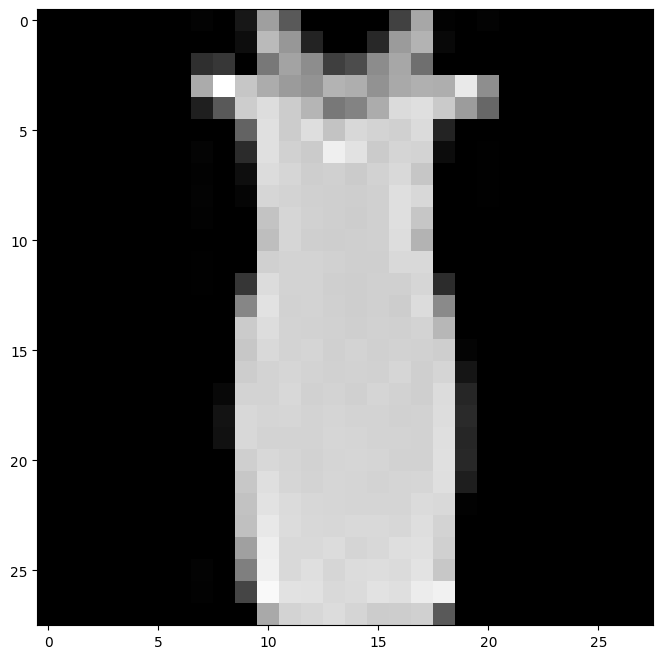

In [61]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(X_test[i], cmap="gray")
plt.show()

predicted digit is: 2
actual digit is: 5


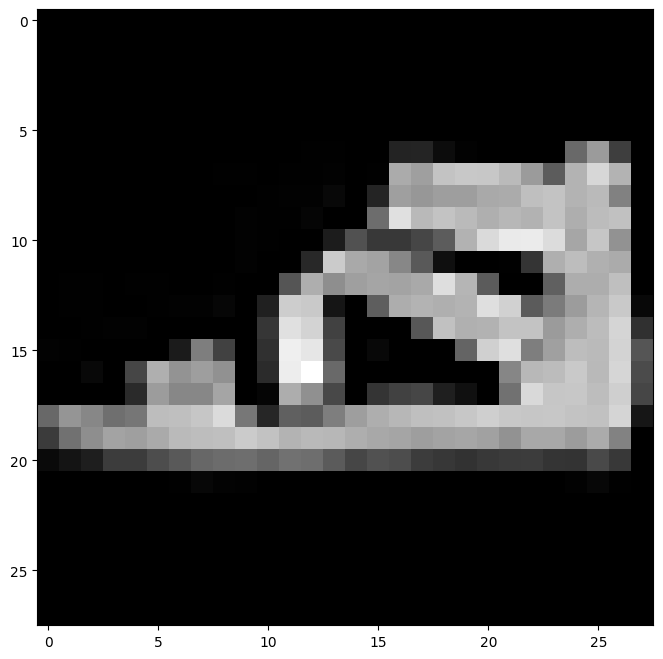

In [62]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(X_test[i], cmap="gray")
plt.show()

** Remarks **

- Very strange.. all predictions are 2's, and its certainly not by chance as checking some predicted label yield:

In [63]:
# Check predicted labels for several random test inputs
for _ in range(10):
    i = np.random.randint(0, len(flat_test_X))
    y_hat = net.predict(flat_test_X[i])
    print(f"Predicted: {y_hat}, Actual: {np.argmax(onehot_test_y[i])}")


Predicted: 2, Actual: 2
Predicted: 2, Actual: 0
Predicted: 2, Actual: 0
Predicted: 2, Actual: 1
Predicted: 2, Actual: 2
Predicted: 2, Actual: 7
Predicted: 2, Actual: 9
Predicted: 2, Actual: 5
Predicted: 2, Actual: 8
Predicted: 2, Actual: 8


** Remarks **

- looks like the model has somehow collapsed into always predicting one class, likely because either the loss function is being minimized more easily by favoring 2, or the gradients aren’t helping the network separate other classes.

- This can be allieviated if we use a a different cost function as MSE is not well-suited for classification, but for our purpose this has been a really good case study on when models can go "wrong" even if everything appeared to be working. 

- This explains why the MSE dropped initially but stablized, as the model started to make the same predictions for every epoch after the 1st. 


# Conclusions

- This has been a really valuable learning experience that even when the model initiates and trains properly, metrics appear to be going in the right direction(MSE decreasing), the output can still be complete nonsense due to fundamental problems in the model. In this case, we had a mode collapse where the model started making the same predictions for every input.

- I do hope to come back to this dataset for a future algorithm to see if we can do better